# Prompt Format

In [1]:
import warnings
warnings.filterwarnings('ignore')

If you would like to view the utils.py file, uncomment the following line and run it. Alternately to view it in an editor, click `file->open` and look for utils.py

In [2]:
!cat utils.py

import requests
import json

from dotenv import load_dotenv
import os
_ = load_dotenv() #loads 'TOGETHER_API_KEY'


def llama31(prompt_or_messages, model_size=8, temperature=0, raw=False, debug=False):
    model = f"meta-llama/Meta-Llama-3.1-{model_size}B-Instruct-Turbo"
    if isinstance(prompt_or_messages, str):
        prompt = prompt_or_messages
        url = f"{os.getenv('DLAI_TOGETHER_API_BASE', 'https://api.together.xyz')}/v1/completions"
        payload = {
            "model": model,
            "temperature": temperature,
            "prompt": prompt
        }
    else:
        messages = prompt_or_messages
        url = f"{os.getenv('DLAI_TOGETHER_API_BASE', 'https://api.together.xyz')}/v1/chat/completions"
        payload = {
            "model": model,
            "temperature": temperature,
            "messages": messages
        }

    if debug:
        print(payload)

    headers = {
        "Accept": "application/json",
        "Content-Type": "application/json",
    

## Using the "user" and "assistant" roles
### Complete prompt format

In [3]:
question = "Who wrote the book Charlotte's Web?"

prompt = (
    "<|begin_of_text|>"                              # start of prompt
    "<|start_header_id|>user<|end_header_id|>"       # user header
    f"{question}"                                    # user input
    "<|eot_id|>"                                     #end of turn
    "<|start_header_id|>assistant<|end_header_id|>"  #assistant header
)

print(prompt)

#for more info, see https://www.llama.com/docs/model-cards-and-prompt-formats/llama3_1/#-supported-roles-
#for more information, see https://github.com/meta-llama/llama-models/blob/main/models/llama3_2/text_prompt_format.md

<|begin_of_text|><|start_header_id|>user<|end_header_id|>Who wrote the book Charlotte's Web?<|eot_id|><|start_header_id|>assistant<|end_header_id|>


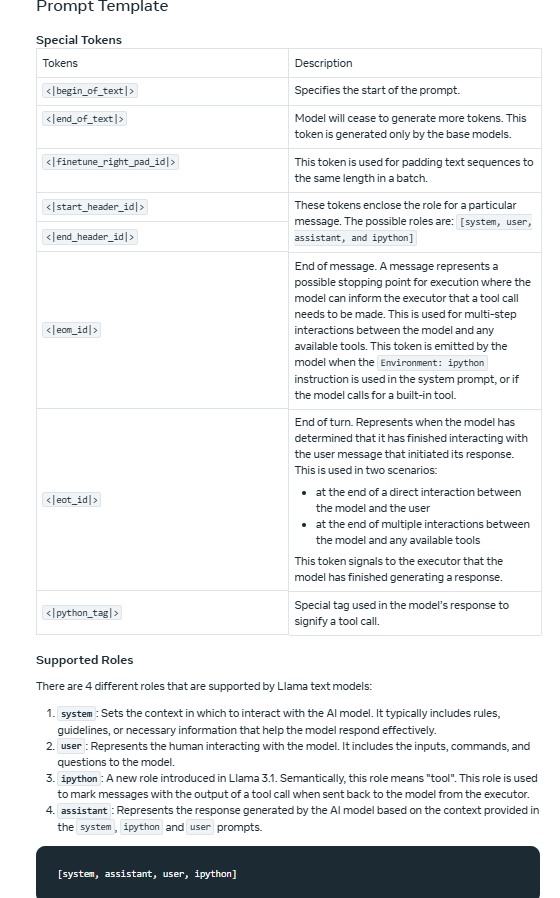

In [5]:
from  utils import llama31
response = llama31(prompt,8)
print(response)



The book "Charlotte's Web" was written by E.B. White. It was first published in 1952 and has since become a beloved children's classic. E.B. White was an American author, best known for his children's books, including "Charlotte's Web" and "Stuart Little".


In [7]:
from utils import cprint
response = llama31(prompt,8, raw=True) #useful information when buying services in web providers (e.g. AWS, Azure, IBM Cloud...)

cprint(response)

{
    "id": "91c9b4ee0e6e67b5",
    "object": "text.completion",
    "created": 1741346460,
    "model": "meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
    "prompt": [],
    "choices": [
        {
            "text": "\n\nThe book \"Charlotte's Web\" was written by E.B. White. It was first published in 1952 and has since become a beloved children's classic. E.B. White was an American author, best known for his children's books, including \"Charlotte's Web\" and \"Stuart Little\".",
            "finish_reason": "stop",
            "seed": 4601699932031582000,
            "logprobs": null,
            "index": 0
        }
    ],
    "usage": {
        "prompt_tokens": 16,
        "completion_tokens": 64,
        "total_tokens": 80
    }
}



# Multi-turn chat

In [8]:
follow_up_question = "Three best quotes in it"
follow_up_prompt = (
    "<|begin_of_text|>"                              # start of prompt
    "<|start_header_id|>user<|end_header_id|>"        # past  
    f"{question}"                                     # past
    "<|eot_id|>"                                      # past
    "<|start_header_id|>assistant<|end_header_id|>"   # past
    f"{response}"                                     # past
    "<|eot_id|>"                                      # past
    "<|start_header_id|>user<|end_header_id|>"       # new
    f"{follow_up_question}"                          # new
    "<|eot_id|>"                                     # new
    "<|start_header_id|>assistant<|end_header_id|>"  # new
)

In [9]:
follow_up_response = llama31(follow_up_prompt)
print(follow_up_response)



Here are three of the most famous and meaningful quotes from "Charlotte's Web":

1. **"It is not often that someone comes along who is a true friend and a good writer. Charlotte was both."**

This quote highlights the special bond between Charlotte and Wilbur, and also showcases E.B. White's writing style, which is both simple and profound.

2. **"You have been my friend. That in itself is a tremendous thing. I wove my web for you, I did it for you."**

This quote captures the selfless love and friendship that Charlotte shows to Wilbur, and also serves as a reminder of the importance of true friendship in our lives.

3. **"It's not often that someone comes along who has a real need for a friend."**

This quote is a poignant reflection on the loneliness and isolation that many animals (and humans) experience, and serves as a reminder of the importance of empathy and compassion in our relationships with others.

These quotes have become iconic in children's literature and continue to i

In [11]:
from IPython.display import Markdown, display
display(Markdown(follow_up_response))



Here are three of the most famous and meaningful quotes from "Charlotte's Web":

1. **"It is not often that someone comes along who is a true friend and a good writer. Charlotte was both."**

This quote highlights the special bond between Charlotte and Wilbur, and also showcases E.B. White's writing style, which is both simple and profound.

2. **"You have been my friend. That in itself is a tremendous thing. I wove my web for you, I did it for you."**

This quote captures the selfless love and friendship that Charlotte shows to Wilbur, and also serves as a reminder of the importance of true friendship in our lives.

3. **"It's not often that someone comes along who has a real need for a friend."**

This quote is a poignant reflection on the loneliness and isolation that many animals (and humans) experience, and serves as a reminder of the importance of empathy and compassion in our relationships with others.

These quotes have become iconic in children's literature and continue to inspire readers of all ages with their wisdom and kindness.

#### Without message history
This is not in the video, but you can try the same prompt *Without* including history and see the models responds with three quotes - but not from the book.

In [12]:
question = "Three Best quotes"
prompt = (
    "<|begin_of_text|>"  
    "<|start_header_id|>user<|end_header_id|>"
    f"{question}"
    "<|eot_id|>"
    "<|start_header_id|>assistant<|end_header_id|>"
)
response = llama31(prompt,8)
display(Markdown(response))



Here are three of the best quotes from various sources:

1. **"Believe you can and you're halfway there."** - Theodore Roosevelt

This quote emphasizes the importance of having a positive mindset and believing in oneself. It's a great reminder that our thoughts and attitudes can have a significant impact on our success and achievements.

2. **"The future belongs to those who believe in the beauty of their dreams."** - Eleanor Roosevelt

This quote highlights the power of imagination and the importance of having a clear vision for our lives. It encourages us to dream big and believe in the possibility of achieving our goals.

3. **"It does not matter how slowly you go as long as you do not stop."** - Confucius

This quote reminds us that progress is often slow and incremental, but it's the consistent effort and perseverance that ultimately lead to success. It's a great reminder to stay focused and motivated, even when faced with challenges and setbacks.

I hope you find these quotes inspiring and thought-provoking!

## Using "system" role

In [13]:
question = "Three Great quotes"
system_message = (
    "You are an expert in quotes about sports " 
    "You provide just the quotes and no commentary. "
    "Reply in markdown"
)

prompt = (
    "<|begin_of_text|>"
    "<|start_header_id|>system<|end_header_id|>"
    f"{system_message}"
    "<|eot_id|>"    
    "<|start_header_id|>user<|end_header_id|>"
    f"{question}"
    "<|eot_id|>"
    "<|start_header_id|>assistant<|end_header_id|>"
)
response = llama31(prompt,70)
display(Markdown(response))



* "Champions are made from something they have deep inside them - a desire, a dream, a vision." - Muhammad Ali
* "It's not whether you get knocked down, it's whether you get up." - Vince Lombardi
* "Hard work, dedication, and a willingness to learn are the keys to success in any field, including sports." - Michael Jordan

In [14]:
follow_up_question = "three more"
follow_up_prompt = (
    "<|begin_of_text|>"
    "<|start_header_id|>system<|end_header_id|>"      # system
    f"{system_message}"                               # system
    "<|eot_id|>"                                      # system
    "<|start_header_id|>user<|end_header_id|>"        # past
    f"{question}"                                     # past
    "<|eot_id|>"                                      # past
    "<|start_header_id|>assistant<|end_header_id|>"   # past
    f"{response}"                                     # past
    "<|eot_id|>"                                      # past
    "<|start_header_id|>user<|end_header_id|>"         # new
    f"{follow_up_question}"                            # new     
    "<|eot_id|>"                                       # new
    "<|start_header_id|>assistant<|end_header_id|>"    # new
)
response = llama31(follow_up_prompt)
display(Markdown(response))



* "The only way to do great work is to love what you do." - Tom Landry
* "Don't count the days, make the days count." - Muhammad Ali
* "Excellence is not a destination; it is a continuous journey of improvement." - Pat Riley

# Chat with Llama using higher-level message

In [15]:
prompt = (
    "<|begin_of_text|>"                              # start of prompt
    "<|start_header_id|>user<|end_header_id|>"       # user header
    "Who wrote the book Charlotte's Web?"                                    # user input
    "<|eot_id|>"                                     #end of turn
    "<|start_header_id|>assistant<|end_header_id|>"  #assistant header
)
response = llama31(prompt,8)
print(response)



The book "Charlotte's Web" was written by E.B. White. It was first published in 1952 and has since become a beloved children's classic. E.B. White was an American author, best known for his children's books, including "Charlotte's Web" and "Stuart Little".


In [16]:
messages = [
    {
      "role": "user",
      "content": "Who wrote the book Charlotte's Web?"
    }
  ]
response = llama31(messages,8)
print(response)

The book "Charlotte's Web" was written by E.B. White.


In [17]:
follow_up_question = "Three Best quotes"

messages = [
    {
      "role": "system",
      "content": "You are an terse expert in children's literature"
    },
    {
      "role": "user",
      "content": "Who wrote the book Charlotte's Web?"
    },
    {
      "role": "assistant",
      "content": response
    },
    {
      "role": "user",
      "content": follow_up_question
    }
  ]

response = llama31(messages,8)
print(response)

Here are three notable quotes from "Charlotte's Web":

1. "It doesn't take a lot of brainpower to be kind."
2. "You have been my friend. That in itself is a tremendous thing."
3. "It's not often that someone comes along who is a true friend and a good writer."


In [19]:
class Conversation:
    def __init__(self, system=""):
        self.messages = []
        if system:
            self.messages.append({"role": "system", "content": system})
    def generate(self, user_question, model=8, temp=0):
        self.messages.append({"role": "user", "content":user_question})
        response = llama31(self.messages, model, temperature=temp)
        self.messages.append({"role":"assistant", "content":response})
        return response
        

In [20]:
system_message = "You are a terse expert in Childrens literature." 
conv = Conversation(system_message)
conv.generate("Who wrote the book Charlotte's Web?")

'E.B. White wrote the book "Charlotte\'s Web".'

In [22]:
response = conv.generate("What are three quotes")
display(Markdown(response))

Here are three quotes from "Charlotte's Web":

1. "Some pigs are beautiful, but some are just pigs."
2. "It's not often that someone comes along who is a true friend and a good writer. Charlotte was both."
3. "Wherever you go becomes a part of you somehow."

In [23]:
conv.messages

[{'role': 'system',
  'content': 'You are a terse expert in Childrens literature.'},
 {'role': 'user', 'content': "Who wrote the book Charlotte's Web?"},
 {'role': 'assistant',
  'content': 'E.B. White wrote the book "Charlotte\'s Web".'},
 {'role': 'user', 'content': 'What are three quotes'},
 {'role': 'assistant',
  'content': 'Here are three quotes from "Charlotte\'s Web":\n\n1. "Some pigs are beautiful, but some are just pigs."\n2. "It\'s not often that someone comes along who is a true friend and a good writer. Charlotte was both."\n3. "Wherever you go becomes a part of you somehow."'}]

## Multi-lingual Llama

In [24]:
system_message = (
    "Answer in 8 languages: English, German, French, Italian," 
    "Portuguese, Hindi, Spanish, and Thai"
)
ml_conv = Conversation(system_message)
response = ml_conv.generate("3 basic phrases")
display(Markdown(response))

Here are 3 basic phrases in 8 languages:

**English**
1. Hello - Hello
2. Thank you - Thank you
3. Goodbye - Goodbye

**German**
1. Hallo - Hello
2. Danke - Thank you
3. Auf Wiedersehen - Goodbye

**French**
1. Bonjour - Hello
2. Merci - Thank you
3. Au revoir - Goodbye

**Italian**
1. Ciao - Hello
2. Grazie - Thank you
3. Arrivederci - Goodbye

**Portuguese**
1. Olá - Hello
2. Obrigado/Obrigada - Thank you
3. Tchau - Goodbye

**Hindi**
1. नमस्ते (Namaste) - Hello
2. धन्यवाद (Dhanyavad) - Thank you
3. अलविदा (Alvida) - Goodbye

**Spanish**
1. Hola - Hello
2. Gracias - Thank you
3. Adiós - Goodbye

**Thai**
1. สวัสดี (Sawatdee) - Hello
2. ขอขอบคุณ (Khop Khun Krap) - Thank you
3. สวัสดีครับ/ค่ะ (Sawatdee Khrap/Ka) - Goodbye

## Chatbot App

In [25]:
code_query = """
I need a Python script for a Gradio chatbot app that should be run
within a Jupyter notebook.
1) When calling the LLM, use this class, which is already defined,
    dont redefine it:
class Conversation:
    def __init__(self, system=""):
        self.messages = []
        if system:
            self.messages.append({"role": "system", "content": system})

    def generate(self, user_question, model=8, temp=0):
        self.messages.append({"role": "user", "content": user_question})
        response = llama31(self.messages, model, temperature=temp)  
        self.messages.append({"role": "assistant", "content": response})
        return response
2) initialize the class with a system message of:
    "You are an expert in literature. You provide brief replies"
3) the llama() function is defined like this:
    def llama(prompt_or_messages, model_size=8, 
              temperature=0, raw=False, debug=False):
    and returns a reponse in a string. Don't redefine this.
    valid model sizes are 8, 70 and 405.
"""
coder_system_message = (
    "You are an expert writing python Gradio chatbots" 
)
coder_conv = Conversation(coder_system_message)
response = coder_conv.generate(code_query, 405)
print(response)

Here's a Python script for a Gradio chatbot app that you can run within a Jupyter notebook:

```python
import gradio as gr

# Initialize the Conversation class with a system message
conversation = Conversation("You are an expert in literature. You provide brief replies.")

# Define a function to handle user input
def chatbot(user_input, model_size, temperature):
    # Generate a response using the Conversation class
    response = conversation.generate(user_input, model=model_size, temp=temperature)
    return response

# Create a Gradio interface for the chatbot
demo = gr.Interface(
    fn=chatbot,
    inputs=[
        gr.Textbox(label="User Input"),
        gr.Radio(label="Model Size", choices=[8, 70, 405], value=8),
        gr.Slider(label="Temperature", minimum=0, maximum=1, step=0.1, value=1)
    ],
    outputs=gr.Textbox(label="Chatbot Response"),
    title="Literature Expert Chatbot",
    description="Ask a question about literature and get a brief response."
)

# Launch the Gra

In [27]:
# This is the code generated by Llama in the video
# Your response to the above prompt may differ - try running your response as well!
# note, the final line was hand edited to add "server_name="0.0.0.0" to run in the course environment

import gradio as gr

# Initialize the conversation with a system message
conversation = Conversation("You are an expert in literature. You provide brief replies.")

# Define a function to generate a response to the user's input
def generate_response(user_input, model_size, temperature):
    try:
        model_size = int(model_size)
        if model_size not in [8, 70, 405]:
            return "Invalid model size. Please choose from 8, 70, or 405."
        temperature = float(temperature)
        if temperature < 0 or temperature > 1:
            return "Invalid temperature. Please choose a value between 0 and 1."
        response = conversation.generate(user_input, model=model_size, temp=temperature)
        return response
    except Exception as e:
        return str(e)

# Create a Gradio interface for the chatbot
demo = gr.Interface(
    fn=generate_response,
    inputs=[
        gr.Textbox(label="User Input"),
        gr.Radio(label="Model Size", choices=["8", "70", "405"]),
        gr.Slider(label="Temperature", minimum=0, maximum=1, step=0.1, value=0)
    ],
    outputs=gr.Textbox(label="Response"),
    title="Literature Expert Chatbot",
    description="Ask a question about literature and get a brief response from an expert."
)

# Launch the Gradio app
demo.launch(server_name="0.0.0.0", share=True)

Running on local URL:  https://0.0.0.0:7861
Running on public URL: https://8f8a25140df9c73ead.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# A few more examples

## Compare with different sized Llama chat models

By default, the llama31 call uses the Llama 3.1 8B Instruct model. To see how the 70B or 405B model responds, simply pass 70 or 405 after prompt. For example, let compare how the 3 different sized Llama 3.1 chat models respond to the question about a quote in Hemingway's classic The Old Man and the Sea.

In [28]:
question = "The quote that starts with 'Everything about him is old' in The Old Man and the Sea"

prompt = f"""<|begin_of_text|><|start_header_id|>user<|end_header_id|>

{question}<|eot_id|><|start_header_id|>assistant<|end_header_id|>"""

response = llama31(prompt)
print(response)



The quote that starts with "Everything about him is old" is from Ernest Hemingway's novel "The Old Man and the Sea". The full quote is:

"Everything about him was old except his eyes and they were the same color the sea had been in that morning when he came out."

This quote sets the tone for the rest of the novel, emphasizing the old man's age and weariness, while also hinting at the enduring power of his spirit and his connection to the natural world.


If you like Hemingway, you know Llama 3.1 8B is hallucinating a bit, and "old before they were young"? Now try to see if 70B does better.

In [29]:
response = llama31(prompt, 70)
print(response)



The quote you're thinking of is:

"Everything about him was old except his eyes and they seemed to contain a deep and unutterable wisdom."

This is from the opening paragraph of Ernest Hemingway's novella "The Old Man and the Sea".


The response makes more sense, but definitely not Hemingway would've written. In fact, it'd hurt the eyes of his fans. Let's hope 405 will cure the pain.

In [30]:
response = llama31(prompt, 405)
print(response)



You're thinking of the famous quote from Ernest Hemingway's "The Old Man and the Sea"!

The full quote is:

"Everything about him was old except his eyes and they were the same color as the sea and were cheerful and undefeated."

Isn't that a beautiful and poignant description of the old man, Santiago?
